<a href="https://colab.research.google.com/github/DhanrajTiwari/Online_Retail-customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/My Drive/Datasets/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


By using describe fuction we get to know that our minimum quantity is in negative and we know that a quantity will never be in negative. So we have to remove redundancy to get better accuracy.

In [6]:
df = df.loc[df['Quantity']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Now our data is better after removing redundancy.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


Now we have to calculate monetary to see no of sales happened.

In [8]:
df['Sales'] = df.Quantity * df.UnitPrice
monetary = df.groupby('CustomerID').Sales.sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


frequency is used to calcuate No. of transaction occur within the period.

In [9]:
frequency = df.groupby('CustomerID').InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Now we have to calculate the recency which us most recent purchase date.

In [10]:
last_date =max(df.InvoiceDate)
last_date

Timestamp('2011-12-09 12:50:00')

In [11]:
df['Diff'] = last_date - df.InvoiceDate
recency = df.groupby('CustomerID').Diff.min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


Now combining all data into one

In [12]:
rmf = monetary.merge(frequency, on = 'CustomerID')
rmf = rmf.merge(recency, on = 'CustomerID')
rmf.columns = ['CustomerID','monetary','frequency','recency']
rmf

,CustomerID,monetary,frequency,recency
0,12346.0,77183.60,1,325 days 02:49:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,277 days 02:58:00
4335,18281.0,80.82,7,180 days 01:57:00
4336,18282.0,178.05,12,7 days 01:07:00
4337,18283.0,2094.88,756,3 days 00:48:00


In [13]:
rmf_drop_cus = rmf.drop('CustomerID',axis=1)
rmf_drop_cus.recency = rmf_drop_cus.recency.dt.days
rmf_drop_cus.head()

,monetary,frequency,recency
0,77183.60,1,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


We completed our analysis part where we got insights from our data.




**Now we have to do analysis of our data using KMeans clustering Technique.**

In [14]:
data = []
for k in range(1,20):
  KM_clustering = KMeans(n_clusters=k)
  KM_clustering.fit(rmf_drop_cus)
  data.append(KM_clustering)

In [15]:
model = KMeans(n_clusters=5)
Cluster = model.fit_predict(rmf_drop_cus)
Cluster

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [16]:
rmf_drop_cus['Cluster'] = Cluster
rmf_drop_cus

,monetary,frequency,recency,Cluster
0,77183.60,1,325,2
1,4310.00,182,1,0
2,1797.24,31,74,0
3,1757.55,73,18,0
4,334.40,17,309,0
...,...,...,...,...
4334,180.60,10,277,0
4335,80.82,7,180,0
4336,178.05,12,7,0
4337,2094.88,756,3,0


In [17]:
km_cluster_sale =rmf_drop_cus.groupby("Cluster").monetary.mean()
km_cluster_Recency =rmf_drop_cus.groupby("Cluster").recency.mean()
km_cluster_Frequence =rmf_drop_cus.groupby("Cluster").frequency.mean()
km_cluster_sale

Cluster
0      1049.274575
1    269931.660000
2     51858.727500
3    149828.502000
4     10022.790242
Name: monetary, dtype: float64

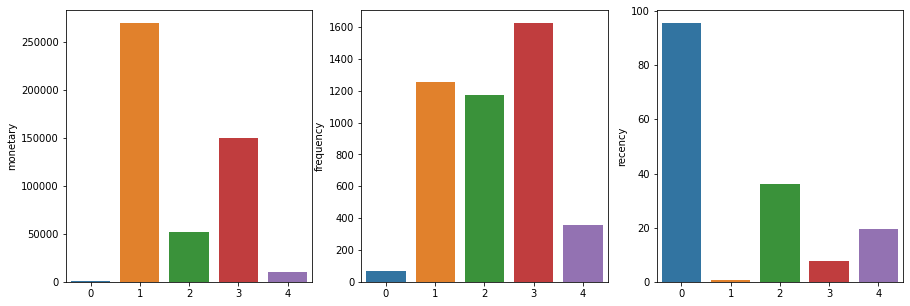

In [18]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_sale , ax = axs[0])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Frequence , ax = axs[1])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Recency , ax = axs[2])

**Conclusion**


We plotted a graph in which we got our rfm using kmeans clustering.